## Finpro Stage 1 - EDA - Application Train - Partition num1 and num2

# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  1.4.4
seaborn version :  0.11.2


In [20]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [21]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Data

In [22]:
# Load the data from the CSV file
data = pd.read_csv("application_train.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())


First few rows of the dataset:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Descriptive Statistics

In [23]:
num7 = ['TARGET', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'] 

In [24]:
# Display info about the dataset
print("\nInfo about the dataset:")
data.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [25]:
# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(data.describe())


Descriptive statistics of the dataset:


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Pendekatan Numerik

In [26]:
num7 = ['TARGET', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'] 

In [27]:
# Menampilkan 5 baris pertama dari kolom-kolom yang ada di num1
data[num7].head()

,TARGET,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data[num7].describe()

,TARGET,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [29]:
#Jumlah data yang null
data[num7].isna().sum()

TARGET                            0
FLAG_DOCUMENT_14                  0
FLAG_DOCUMENT_15                  0
FLAG_DOCUMENT_16                  0
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_19                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [30]:
# Hitung persentase missing value
missing_percentage = data[num7].isna().mean() * 100

# Menampilkan persentase missing value
print("Persentase Missing Value (%):")
print(missing_percentage)

# Loop untuk melakukan tindakan sesuai kriteria yang ditentukan
for col, pct in missing_percentage.items():
    if pct == 0:
        continue  # Tidak ada missing value, tidak melakukan apa-apa
    elif pct <= 5:
        # Drop baris yang memiliki missing value pada kolom ini
        data = data.dropna(subset=[col])
        print(f"Drop rows with missing values in column: {col} (Missing: {pct:.2f}%)")
    elif 5 < pct <= 20:
        # Mengisi missing value dengan median dari kolom tersebut
        median_value = data[col].median()
        data[col] = data[col].fillna(median_value)
        print(f"Fill missing values in column: {col} with median value (Missing: {pct:.2f}%)")
    else:
        # Drop kolom jika missing value lebih dari 20%
        data = data.drop(columns=[col])
        print(f"Drop column: {col} (Missing: {pct:.2f}%)")

# Tampilkan hasil akhir setelah penanganan missing value
display(data.head())


Persentase Missing Value (%):
TARGET                         0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_21               0.000000
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64
Fill missing values in column: AMT_REQ_CREDIT_BUREAU_HOUR with median value (Missing: 13.50%)
Fill missing values in column: AMT_REQ_CREDIT_BUREAU_DAY with median value (Missing: 13.50%)
Fill missing values in column: AMT_REQ_CREDIT_BUREAU_WEEK with median value (Missing: 13.50%)
Fill missing values in column: AMT_REQ_CREDIT_BUREAU_MON with median value

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Jumlah data yang null
data[num7].isna().sum()

TARGET                        0
FLAG_DOCUMENT_14              0
FLAG_DOCUMENT_15              0
FLAG_DOCUMENT_16              0
FLAG_DOCUMENT_17              0
FLAG_DOCUMENT_18              0
FLAG_DOCUMENT_19              0
FLAG_DOCUMENT_20              0
FLAG_DOCUMENT_21              0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

### C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

### Analisis Nilai Aneh pada `num7`:

1. FLAG_DOCUMENT_14 hingga FLAG_DOCUMENT_21 semuanya memiliki nilai rata-rata (mean) yang sangat rendah, mendekati 0, dengan standar deviasi juga sangat kecil.
Nilai minimum, 25%, 50%, dan 75% semuanya adalah 0, dengan nilai maksimum 1. Ini menunjukkan bahwa sebagian besar data di kolom ini memiliki nilai 0, dan hanya beberapa yang bernilai 1.
Hal ini mungkin berarti bahwa dokumen-dokumen ini jarang aktif atau digunakan dalam konteks data ini, sehingga banyak catatan memiliki nilai 0.

2. Kolom AMT_REQ_CREDIT_BUREAU_QRT:
Kolom ini memiliki nilai maksimum yang sangat tinggi, yaitu 261, padahal nilai di kuartil ke-75 adalah 0. Nilai rata-rata juga rendah (0.265) dibandingkan nilai maksimum, menunjukkan adanya outlier atau nilai yang tidak umum di kolom ini.
Sebagian besar nilai di kolom ini adalah 0 (nilai di 25%, 50%, dan 75% semuanya 0), namun terdapat beberapa kasus yang menunjukkan frekuensi permintaan kredit yang sangat tinggi dalam periode kuartal. Ini bisa menandakan anomali atau kasus ekstrem di mana permintaan kredit terjadi sangat sering.

3. Kolom AMT_REQ_CREDIT_BUREAU_YEAR:
Kolom ini juga memiliki rentang nilai yang besar, dengan nilai maksimum 25, sedangkan nilai rata-rata hanya 1.899. Sebagian besar data memiliki nilai 0 hingga 3 (hingga persentil ke-75), namun terdapat outliers yang cukup besar (hingga 25 kali permintaan kredit dalam satu tahun).
Distribusi ini mungkin menunjukkan bahwa sebagian kecil pelanggan memiliki aktivitas permintaan kredit yang sangat tinggi dalam satu tahun.

4. Kolom AMT_REQ_CREDIT_BUREAU_MON:
Kolom ini memiliki maksimum 27, namun median dan 75%-nya adalah 0, menunjukkan ada sejumlah kecil outliers yang memiliki frekuensi permintaan kredit bulanan sangat tinggi.

5. Kesimpulan:
Kolom-kolom FLAG_DOCUMENT sebagian besar menunjukkan data biner yang cenderung bernilai 0. Sedangkan, kolom AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, dan AMT_REQ_CREDIT_BUREAU_MON memiliki outliers yang besar, menunjukkan sebagian kecil dari data memiliki aktivitas permintaan kredit yang sangat tinggi. Kolom-kolom ini layak untuk pemeriksaan lebih lanjut, terutama jika ingin mengidentifikasi pola outlier atau anomali yang mungkin berpengaruh terhadap nilai TARGET.

# Exploratory Data Analysis (EDA)

# 2. Univariate Analysis (20 Poin)

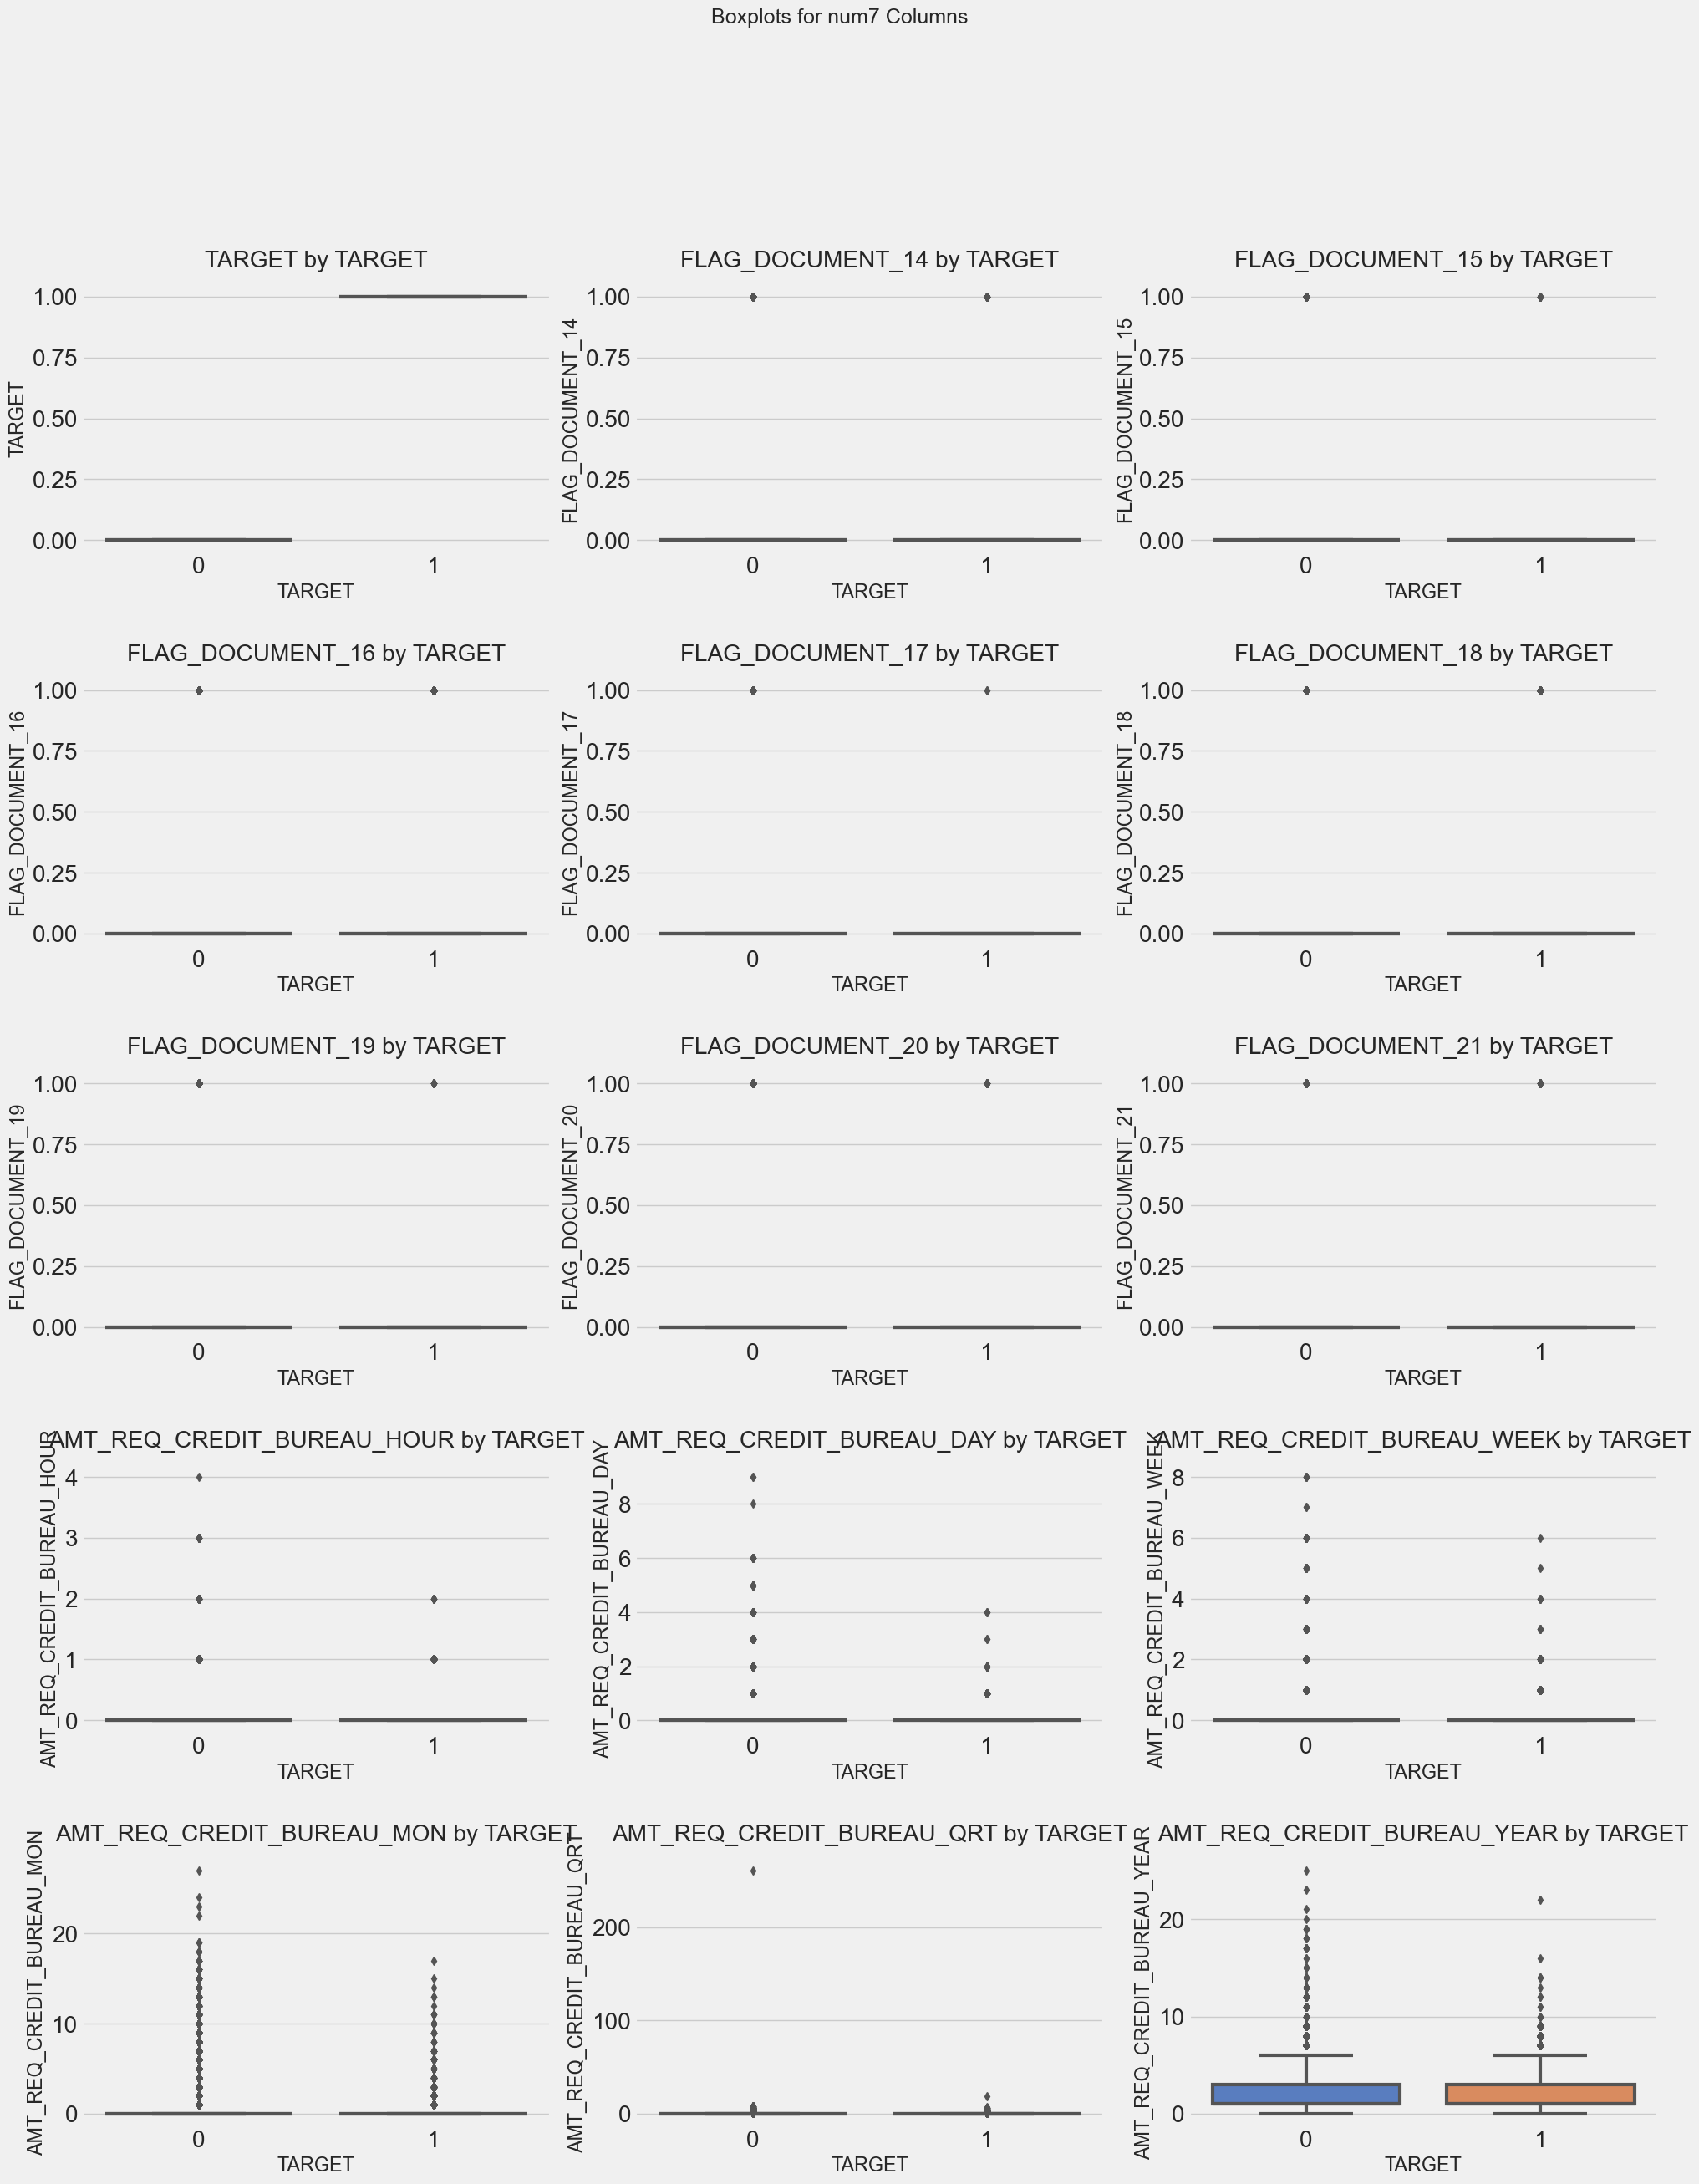

In [38]:
# Filter kolom-kolom di num7 agar hanya mengambil kolom yang ada di data
valid_columns_num7 = [col for col in num7 if col in data.columns]

# Buat boxplot untuk setiap kolom di num7
n_cols = 3
n_rows = int(len(valid_columns_num7) / n_cols) + (len(valid_columns_num7) % n_cols > 0)

plt.figure(figsize=(20, 5 * n_rows))
for i, col in enumerate(valid_columns_num7):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='TARGET', y=col, data=data, palette='muted')
    plt.title(f'{col} by TARGET', pad=15)  # Mengatur jarak pad untuk setiap judul subplot
    plt.xlabel('TARGET')
    plt.ylabel(col)

# Mengatur posisi judul utama lebih tinggi dan meningkatkan jarak antar subplot
plt.suptitle('Boxplots for num7 Columns', fontsize=18, y=1.05)  # Posisi y dinaikkan lebih tinggi
plt.subplots_adjust(hspace=0.7)  # Meningkatkan jarak antar subplot secara vertikal
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Memberikan ruang untuk judul utama
plt.show()



### Observasi dari Visualisasi `boxplot`:

1. Kolom FLAG_DOCUMENT_XX: Untuk kolom-kolom seperti FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, hingga FLAG_DOCUMENT_21, distribusi datanya hampir seragam, dengan sebagian besar nilainya mendekati 0. Ini menunjukkan bahwa banyak dokumen flag tersebut jarang aktif. Tidak tampak perbedaan yang signifikan antara nilai TARGET 0 dan 1, sehingga kolom-kolom ini mungkin tidak terlalu kuat dalam membedakan antara kelompok TARGET.

2. Kolom AMT_REQ_CREDIT_BUREAU_XX: Untuk variabel seperti AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, dan seterusnya, terdapat outliers yang cukup signifikan. Secara umum, permintaan kredit lebih tinggi pada kelompok dengan TARGET 1, terutama pada variabel AMT_REQ_CREDIT_BUREAU_YEAR. Ini menunjukkan bahwa orang-orang yang lebih sering mengajukan permintaan kredit dalam jangka waktu tertentu cenderung memiliki nilai TARGET yang lebih tinggi (mungkin berhubungan dengan risiko kredit yang lebih tinggi).

3. Perbedaan Distribusi antara TARGET 0 dan 1: Beberapa variabel memiliki perbedaan distribusi antara kelompok TARGET 0 dan 1, meskipun perbedaannya tidak selalu jelas. Namun, untuk kolom seperti AMT_REQ_CREDIT_BUREAU_YEAR, terlihat bahwa kelompok dengan TARGET 1 memiliki rentang nilai yang lebih besar, yang mungkin menunjukkan korelasi positif antara permintaan kredit yang sering dan kemungkinan gagal bayar.




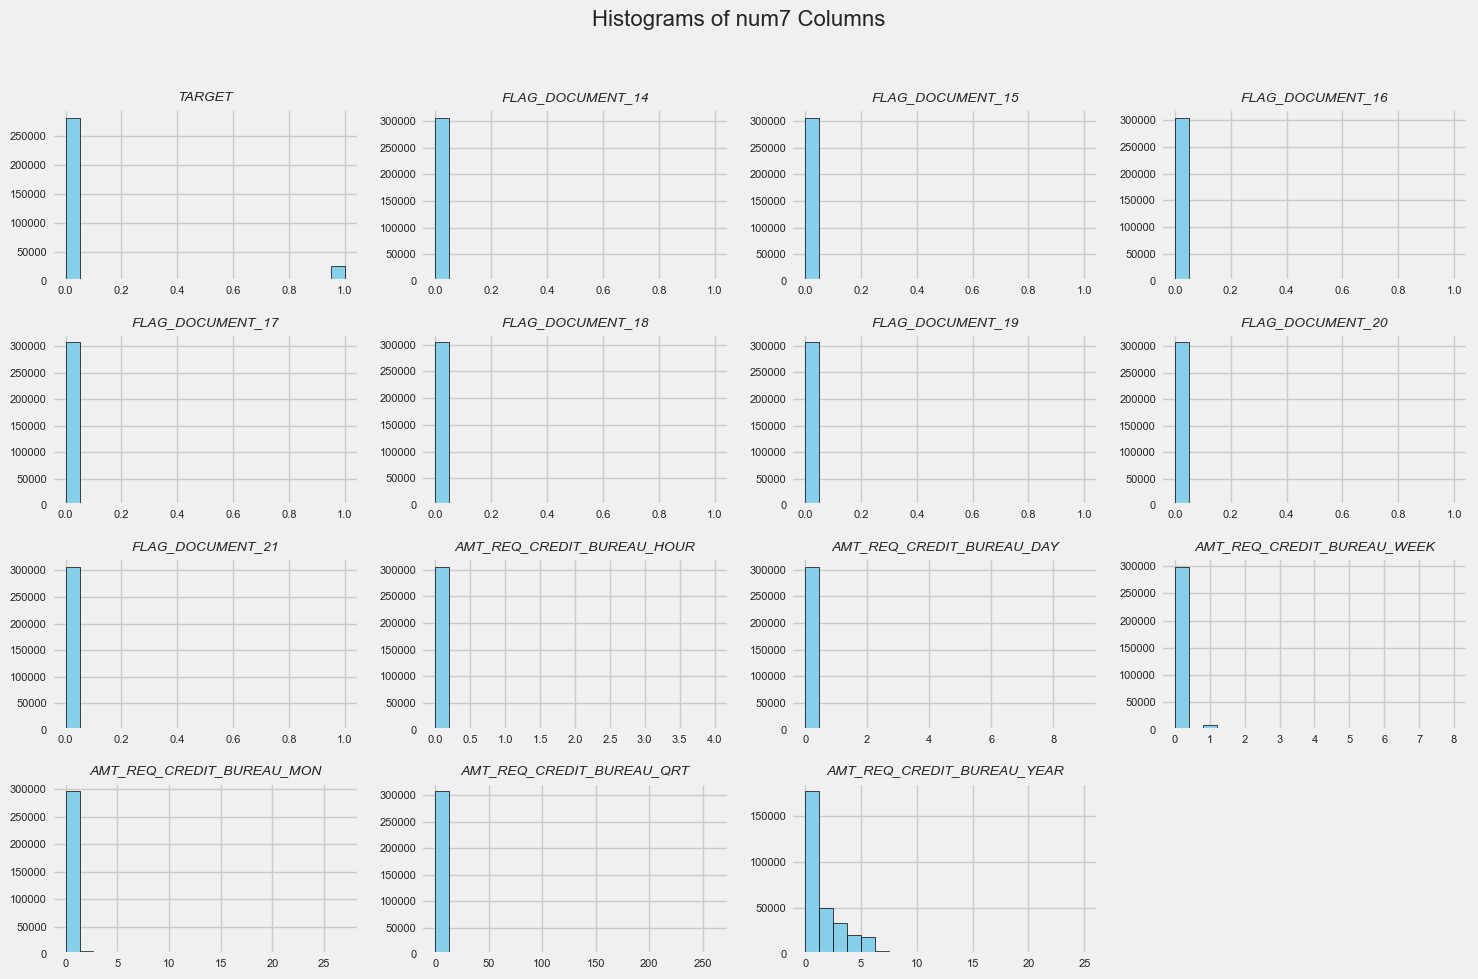

In [42]:
# Filter kolom-kolom di num7 agar hanya mengambil kolom yang ada di data
valid_columns = [col for col in num7 if col in data.columns]

# Membuat histogram untuk setiap kolom yang valid
axes = data[valid_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of num7 Columns', fontsize=16)

# Mengatur ukuran tulisan dan kemiringan nama kolom, serta menjaga label angka tetap tidak miring
for ax, col in zip(axes.flatten(), valid_columns):
    ax.set_title(col, fontsize=10, fontstyle='italic')  # Memperkecil ukuran font dan memiringkan nama kolom
    ax.tick_params(axis='x', labelrotation=0, labelsize=8)  # Label angka di sumbu x tidak dimiringkan
    ax.tick_params(axis='y', labelsize=8)  # Label angka di sumbu y juga tanpa kemiringan

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Mengatur agar suptitle tidak tertabrak dengan plot
plt.show()


## Hasil Observasi dari Histogram:
Berdasarkan histogram yang ditampilkan, terdapat beberapa observasi penting terkait distribusi data:

1. Distribusi Target Tidak Seimbang:
Kolom TARGET menunjukkan bahwa mayoritas sampel memiliki nilai 0, dengan hanya sebagian kecil sampel bernilai 1. Ini menunjukkan bahwa dataset sangat tidak seimbang, yang sering terjadi dalam kasus klasifikasi biner.

2. FLAG_DOCUMENT Columns:
Semua kolom FLAG_DOCUMENT_14 hingga FLAG_DOCUMENT_21 adalah kolom biner dengan sebagian besar nilai pada 0, dan hanya sedikit sekali yang bernilai 1. Artinya, hanya sebagian kecil individu yang memiliki dokumen-dokumen terkait.

3. AMT_REQ_CREDIT_BUREAU Columns:
Kolom AMT_REQ_CREDIT_BUREAU (permintaan laporan kredit dalam jangka waktu tertentu seperti per jam, hari, minggu, bulan, kuartal, dan tahun) menunjukkan bahwa sebagian besar nilai adalah 0, yang artinya sebagian besar individu tidak meminta laporan kredit. Namun, ada distribusi kecil dengan nilai non-0, khususnya di kolom AMT_REQ_CREDIT_BUREAU_YEAR, yang menunjukkan bahwa beberapa individu melakukan permintaan kredit secara lebih sering dalam setahun.

## Tindakan Preprocessing yang Disarankan:

1. Penanganan Data Tidak Seimbang (Imbalanced Data):
Karena kolom TARGET tidak seimbang (lebih banyak nilai 0 daripada 1), ini dapat menyebabkan bias pada model prediksi. Beberapa tindakan yang dapat dilakukan:
- Oversampling: Menambah jumlah sampel untuk kategori minoritas (nilai 1) dengan teknik seperti SMOTE (Synthetic Minority Over-sampling Technique).
- Undersampling: Mengurangi jumlah sampel pada kategori mayoritas (nilai 0), meskipun ini bisa menyebabkan hilangnya informasi.
- Penalti pada Model: Menggunakan model yang memberikan penalti lebih besar pada kesalahan prediksi kelas minoritas, seperti mengatur parameter class_weight pada model klasifikasi seperti Random Forest atau SVM.

2. Penanganan Kolom FLAG_DOCUMENT:
Kolom-kolom FLAG_DOCUMENT bersifat biner dengan sebagian besar nilai 0. Anda bisa mempertimbangkan:
- Pembuangan Kolom: Jika nilai 1 sangat jarang (misalnya kurang dari 1% dari total data), kolom-kolom ini mungkin tidak signifikan secara statistik dan dapat dipertimbangkan untuk dihapus.
- One-Hot Encoding: Jika Anda mempertahankan kolom ini, tidak diperlukan banyak transformasi karena sudah berbentuk biner (0/1). Pastikan untuk mempertahankan kolom ini jika terbukti relevan dalam analisis.

3. Penanganan Kolom AMT_REQ_CREDIT_BUREAU:
Kolom-kolom AMT_REQ_CREDIT_BUREAU menunjukkan nilai yang sebagian besar 0. Beberapa langkah yang bisa diambil:
- Transformasi Logaritmik: Untuk menangani distribusi yang sangat tidak seimbang, Anda bisa menggunakan transformasi logaritmik pada kolom dengan nilai non-0 yang besar, seperti AMT_REQ_CREDIT_BUREAU_YEAR. Hal ini dapat mengurangi skewness dan memperbaiki distribusi.
- Feature Scaling: Kolom seperti AMT_REQ_CREDIT_BUREAU_MON dan AMT_REQ_CREDIT_BUREAU_QRT memiliki outliers besar. Gunakan teknik scaling (seperti MinMaxScaler atau StandardScaler) untuk memastikan bahwa model tidak bias terhadap outlier.
- Binarisasi: Karena sebagian besar nilai adalah 0, Anda bisa mempertimbangkan binarisasi kolom (misalnya dengan menggunakan nilai 1 jika ada permintaan kredit dan 0 jika tidak ada) untuk menyederhanakan model.

4. Penanganan Outliers:
Dari grafik AMT_REQ_CREDIT_BUREAU, beberapa outliers terlihat jelas di kolom AMT_REQ_CREDIT_BUREAU_QRT dan AMT_REQ_CREDIT_BUREAU_YEAR. Anda bisa mempertimbangkan:
- Penghapusan outlier: Menghapus nilai-nilai ekstrem di ujung distribusi (misalnya dengan metode IQR) yang dapat mengganggu model.
- Winsorizing: Membatasi nilai outlier sehingga mereka tetap dalam rentang yang lebih wajar tanpa menghapus sampel.

5. Imputasi Data yang Hilang (Jika Ada):
Jika beberapa kolom memiliki nilai yang hilang (NaN), penting untuk mengatasi hal tersebut sebelum melakukan pemodelan:
- Gunakan metode mean/median imputasi untuk kolom numerik.
- Gunakan mode imputasi untuk kolom kategorikal atau biner.

6. Feature Selection:
- Beberapa kolom seperti FLAG_DOCUMENT mungkin memiliki sedikit informasi yang relevan karena sangat jarang bernilai 1. Anda dapat menggunakan teknik seperti VarianceThreshold atau Chi-Squared Test untuk mengukur relevansi fitur tersebut dengan target, dan memutuskan apakah perlu dibuang.

## Berdasarkan visualisasi density plot yang dihasilkan dari kode tersebut, berikut adalah analisis dari distribusi tiap kolom:




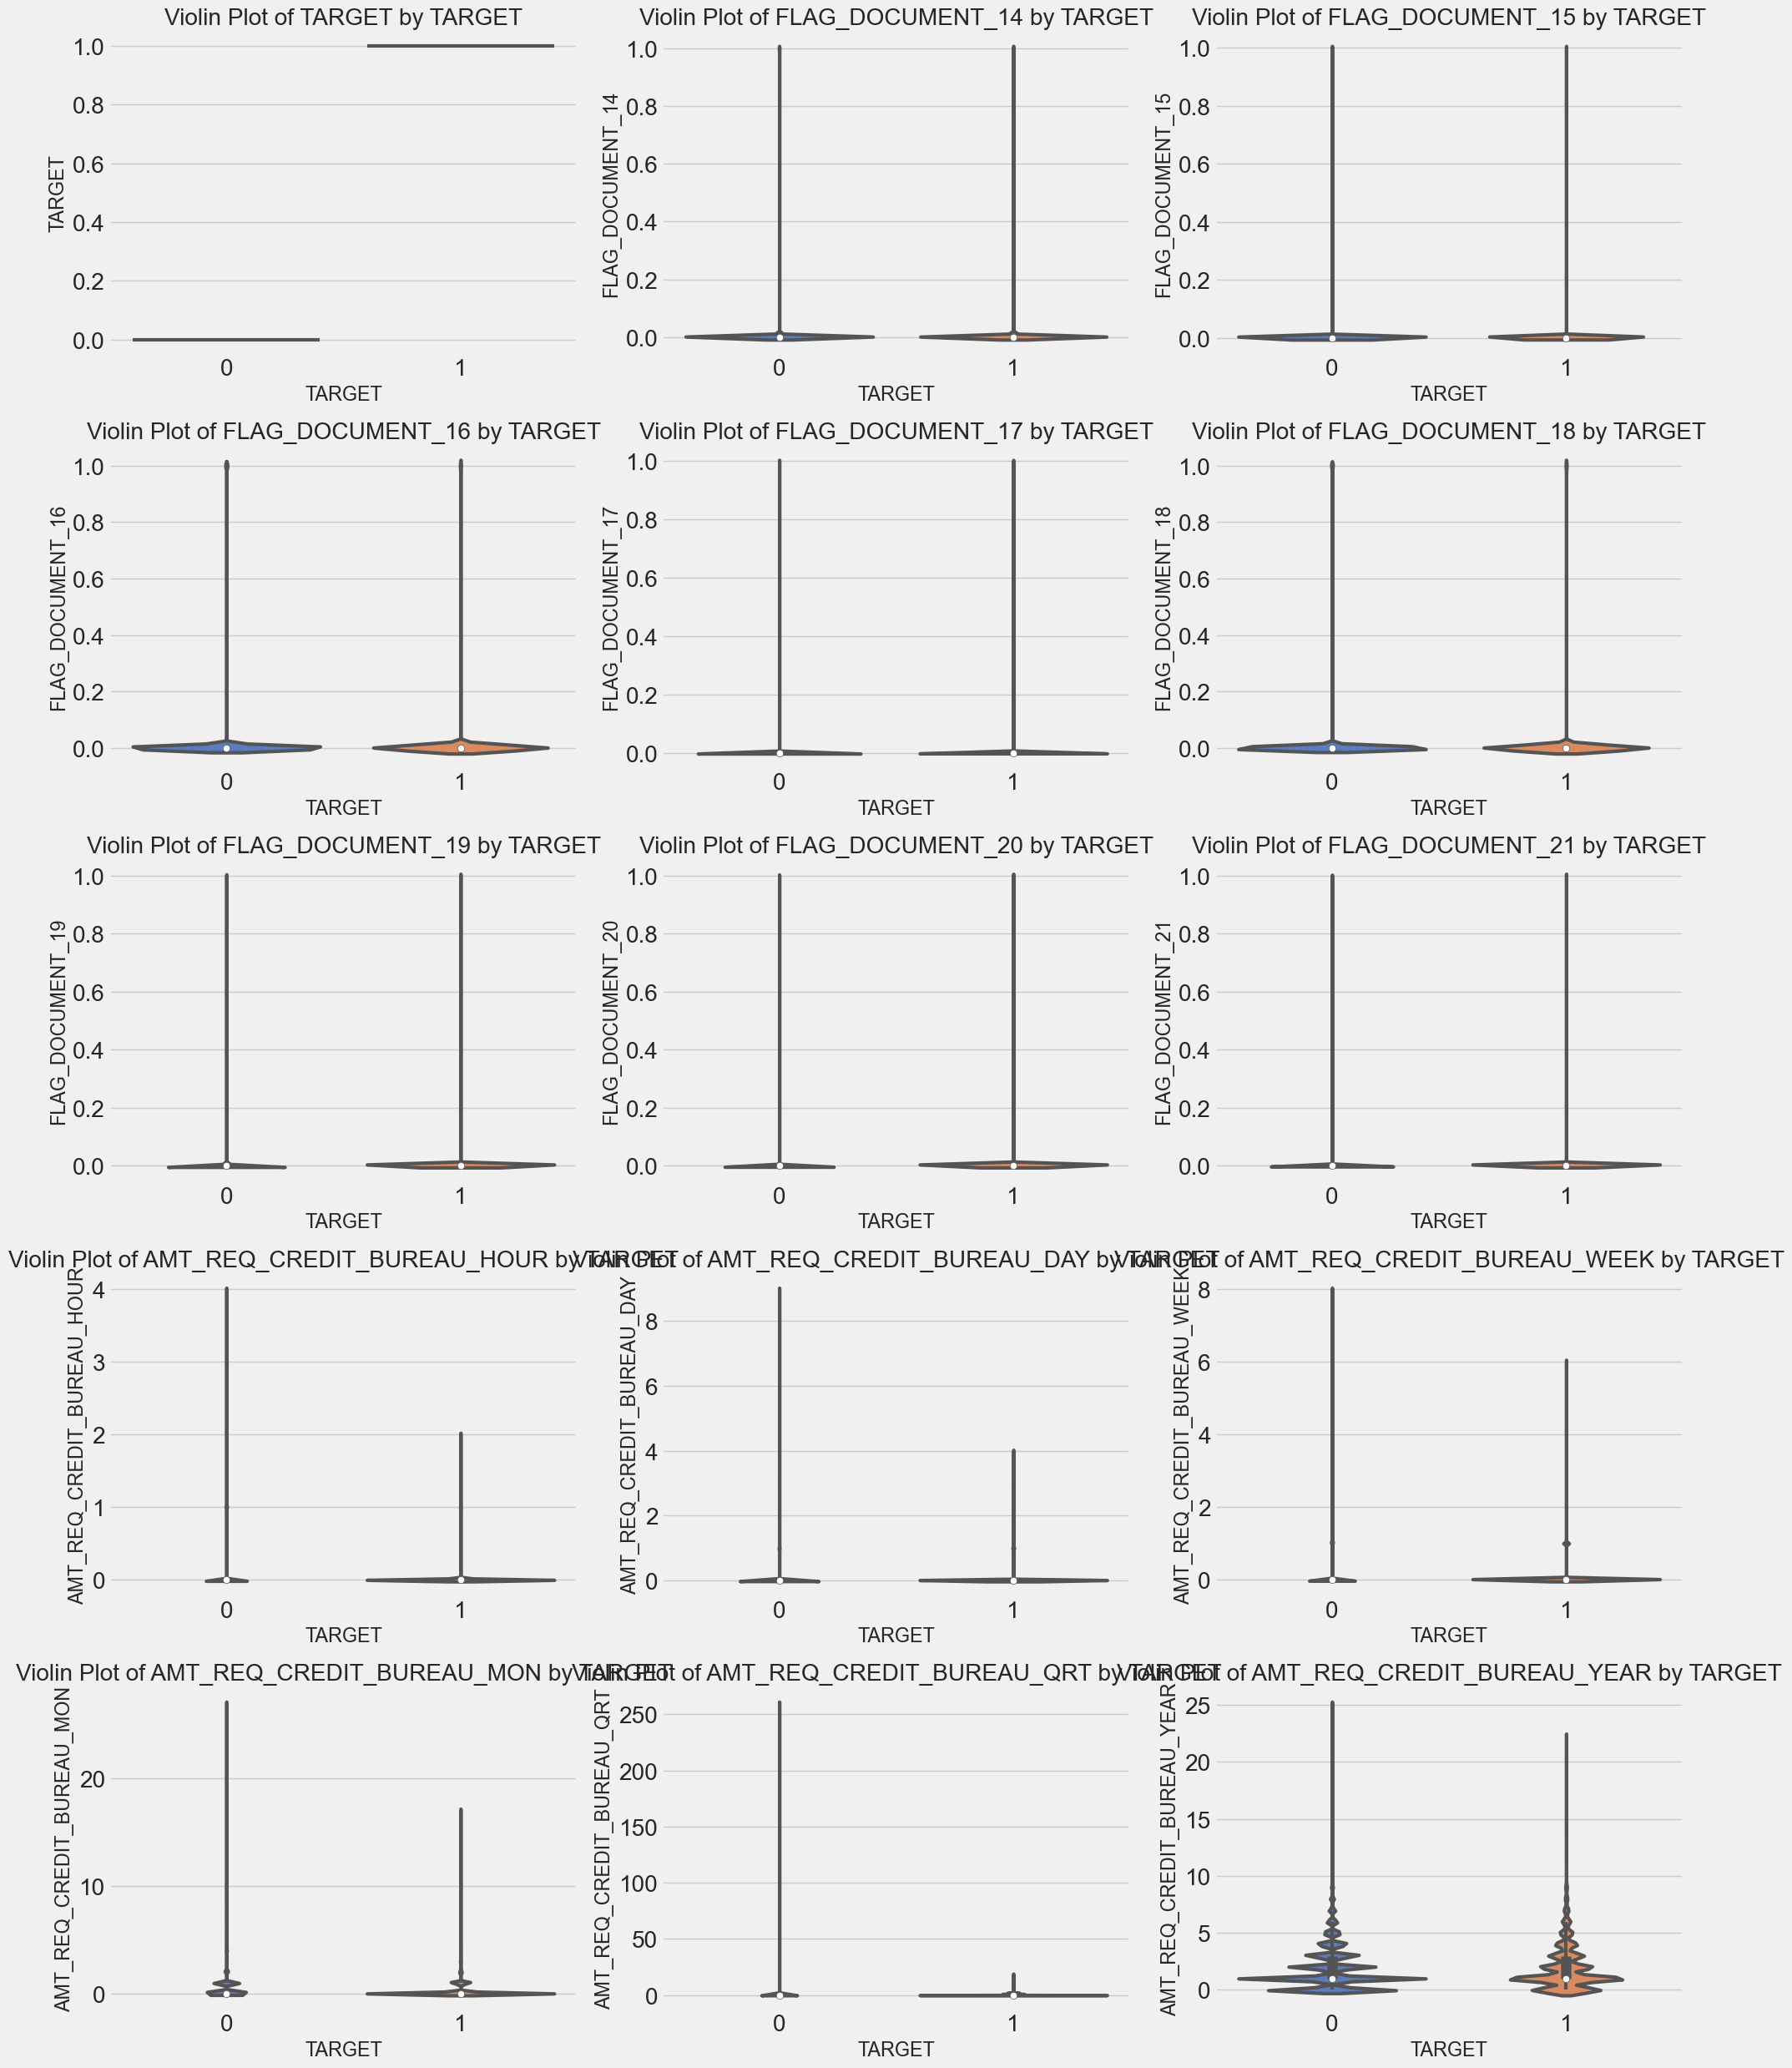

In [43]:
# Filter kolom-kolom di num1 agar hanya mengambil kolom yang ada di data
valid_columns = [col for col in num7 if col in data.columns]

# Buat figure besar untuk menampung semua violin plot
n_cols = 3  # Jumlah kolom dalam grid
n_rows = int(len(valid_columns) / n_cols) + (len(valid_columns) % n_cols > 0)  # Hitung jumlah baris dalam grid

plt.figure(figsize=(20, 5 * n_rows))

# Plot violin plot untuk setiap kolom yang valid
for i, col in enumerate(valid_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x='TARGET', y=col, data=data, palette='muted')
    plt.title(f'Violin Plot of {col} by TARGET')
    plt.xlabel('TARGET')
    plt.ylabel(col)
    plt.tight_layout()

# Tampilkan plot
plt.show()

## Hasil Observasi dari Violin Plot:

Violin plot di atas menunjukkan distribusi beberapa kolom dengan mengacu pada TARGET (0 atau 1). Berikut beberapa observasi penting yang bisa diambil dari grafik ini:

1. FLAG_DOCUMENT_14 hingga FLAG_DOCUMENT_21:
- Violin plot menunjukkan bahwa distribusi data pada kolom FLAG_DOCUMENT hampir sama untuk kedua nilai target (0 dan 1). Sebagian besar distribusi berada di nilai 0, dengan sangat sedikit nilai pada 1.
- Tidak ada perbedaan distribusi yang mencolok antara TARGET 0 dan TARGET 1, yang menandakan bahwa kolom-kolom ini mungkin tidak terlalu relevan atau informatif untuk memprediksi target.

2. AMT_REQ_CREDIT_BUREAU_HOUR hingga AMT_REQ_CREDIT_BUREAU_YEAR:
- Pada kolom-kolom yang menggambarkan frekuensi permintaan kredit (AMT_REQ_CREDIT_BUREAU), distribusi juga menunjukkan bahwa mayoritas data berada di nilai yang sangat kecil (kebanyakan 0), dengan beberapa outlier di beberapa kolom.
- Pada kolom AMT_REQ_CREDIT_BUREAU_YEAR, terlihat bahwa individu dengan nilai target 1 cenderung memiliki permintaan kredit yang lebih banyak dibandingkan dengan mereka yang memiliki target 0. Namun, secara keseluruhan perbedaannya tidak terlalu signifikan.

3. Distribusi Tidak Simetris:
- Hampir semua kolom menunjukkan distribusi yang tidak simetris dengan sebagian besar data terkonsentrasi di sekitar nilai terendah (0), terutama pada kolom AMT_REQ_CREDIT_BUREAU dengan beberapa outlier yang jauh dari mayoritas data.
- Ini menandakan bahwa sebagian besar individu tidak sering meminta laporan kredit dalam waktu tertentu, tetapi ada beberapa individu dengan aktivitas permintaan kredit yang lebih tinggi.

## Tindakan Pre-Processing yang Disarankan:

1. Penanganan Data Tidak Seimbang pada Kolom Biner:
Kolom seperti FLAG_DOCUMENT_14 hingga FLAG_DOCUMENT_21 memiliki distribusi yang sangat tidak seimbang dengan sebagian besar nilai 0. Hal ini bisa menurunkan efektivitas model prediksi.
- Pertimbangkan Pembuangan Kolom: Jika distribusi untuk nilai 1 sangat sedikit, Anda bisa mempertimbangkan untuk membuang kolom-kolom ini karena mungkin tidak memberikan informasi yang signifikan dalam pemodelan.
- Feature Engineering: Jika Anda mempertahankan kolom-kolom ini, bisa jadi perlu untuk membuat kombinasi dari flag yang lebih relevan, atau mengelompokkan mereka ke dalam kategori yang lebih informatif.

2. Penanganan Outlier pada Kolom AMT_REQ_CREDIT_BUREAU:
Beberapa kolom seperti AMT_REQ_CREDIT_BUREAU_QRT dan AMT_REQ_CREDIT_BUREAU_YEAR menunjukkan keberadaan outlier yang signifikan.

- Penghapusan Outlier: Gunakan metode seperti IQR (Interquartile Range) untuk mendeteksi dan menghapus outlier agar tidak mengganggu hasil prediksi.
- Winsorizing: Anda juga bisa mempertimbangkan teknik winsorizing untuk membatasi nilai-nilai ekstrem tanpa menghapus data.
- Scaling: Gunakan normalisasi atau standarisasi pada kolom dengan nilai yang bervariasi jauh untuk membuat distribusi lebih seimbang sebelum diolah oleh model.

3. Penanganan Distribusi Tidak Normal:
Sebagian besar kolom memiliki distribusi yang sangat tidak normal, dengan mayoritas nilai terkonsentrasi di 0. Untuk menangani distribusi semacam ini:

- Binarisasi: Pertimbangkan binarisasi pada kolom AMT_REQ_CREDIT_BUREAU dengan mengonversi nilai non-0 menjadi 1 untuk menunjukkan adanya permintaan kredit.
- Transformasi Logaritmik: Pada kolom seperti AMT_REQ_CREDIT_BUREAU_YEAR, bisa dilakukan transformasi logaritmik untuk menangani nilai-nilai yang sangat tidak merata dan membuat distribusi lebih simetris.

4. Feature Scaling:
Mengingat adanya outlier dan nilai yang tidak merata, Anda bisa menggunakan metode MinMaxScaler atau StandardScaler untuk memastikan bahwa model prediksi tidak bias terhadap fitur-fitur dengan rentang nilai yang besar.

5. Imputasi Data Hilang (Jika Ada):
Jika ada nilai yang hilang pada kolom-kolom ini, lakukan imputasi dengan mean atau median untuk kolom numerik. Untuk kolom biner, nilai hilang dapat diimputasi dengan mode atau menggunakan model prediksi jika dataset cukup besar.

6. Penanganan Data Tidak Seimbang pada TARGET/ Imbalance Data:
Distribusi target tidak seimbang, di mana mayoritas sampel memiliki nilai target 0. Untuk meningkatkan akurasi model pada kelas minoritas (target 1):
- Oversampling: Menggunakan teknik oversampling seperti SMOTE untuk menambah jumlah sampel dari kelas minoritas.
- Class Weight Adjustment: Gunakan model dengan opsi class_weight untuk menyesuaikan penalti bagi kesalahan prediksi pada kelas minoritas.

# 3. Multivariate Analysis (10 Poin)

In [44]:
data[num7].corr()

,TARGET,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161
FLAG_DOCUMENT_14,-0.009464,1.000000,-0.001889,-0.005434,-0.000886,-0.004913,-0.001324,0.030805,0.002291,0.001540,0.013142,0.000051,0.006042,-0.002533,-0.029273
FLAG_DOCUMENT_15,-0.006536,-0.001889,1.000000,-0.003485,-0.000568,-0.003151,-0.000849,0.028299,-0.000637,-0.000072,0.003403,0.001934,0.003271,-0.000430,-0.016670
FLAG_DOCUMENT_16,-0.011615,-0.005434,-0.003485,1.000000,-0.001635,-0.009066,-0.002444,0.082229,0.003544,-0.001643,0.006530,-0.008210,0.003976,0.002995,-0.042964
FLAG_DOCUMENT_17,-0.003378,-0.000886,-0.000568,-0.001635,1.000000,-0.001479,-0.000399,0.026167,-0.000299,-0.001159,-0.000960,-0.002545,0.000473,-0.001025,-0.008780
FLAG_DOCUMENT_18,-0.007952,-0.004913,-0.003151,-0.009066,-0.001479,1.000000,-0.002209,0.081589,0.006259,-0.001785,0.012956,-0.003666,-0.000179,-0.003362,-0.042442
FLAG_DOCUMENT_19,-0.001358,-0.001324,-0.000849,-0.002444,-0.000399,-0.002209,1.000000,0.034981,-0.000447,0.003395,0.001154,-0.001006,-0.002230,-0.001079,-0.006001
FLAG_DOCUMENT_20,0.000215,0.030805,0.028299,0.082229,0.026167,0.081589,0.034981,1.000000,0.007480,-0.001599,0.000078,-0.001239,0.002177,0.000034,-0.010424
FLAG_DOCUMENT_21,0.003709,0.002291,-0.000637,0.003544,-0.000299,0.006259,-0.000447,0.007480,1.000000,-0.001299,-0.001076,-0.000057,-0.003489,-0.002066,-0.005253
AMT_REQ_CREDIT_BUREAU_HOUR,-0.000074,0.001540,-0.000072,-0.001643,-0.001159,-0.001785,0.003395,-0.001599,-0.001299,1.000000,0.230873,0.006422,0.002973,0.000725,0.000361


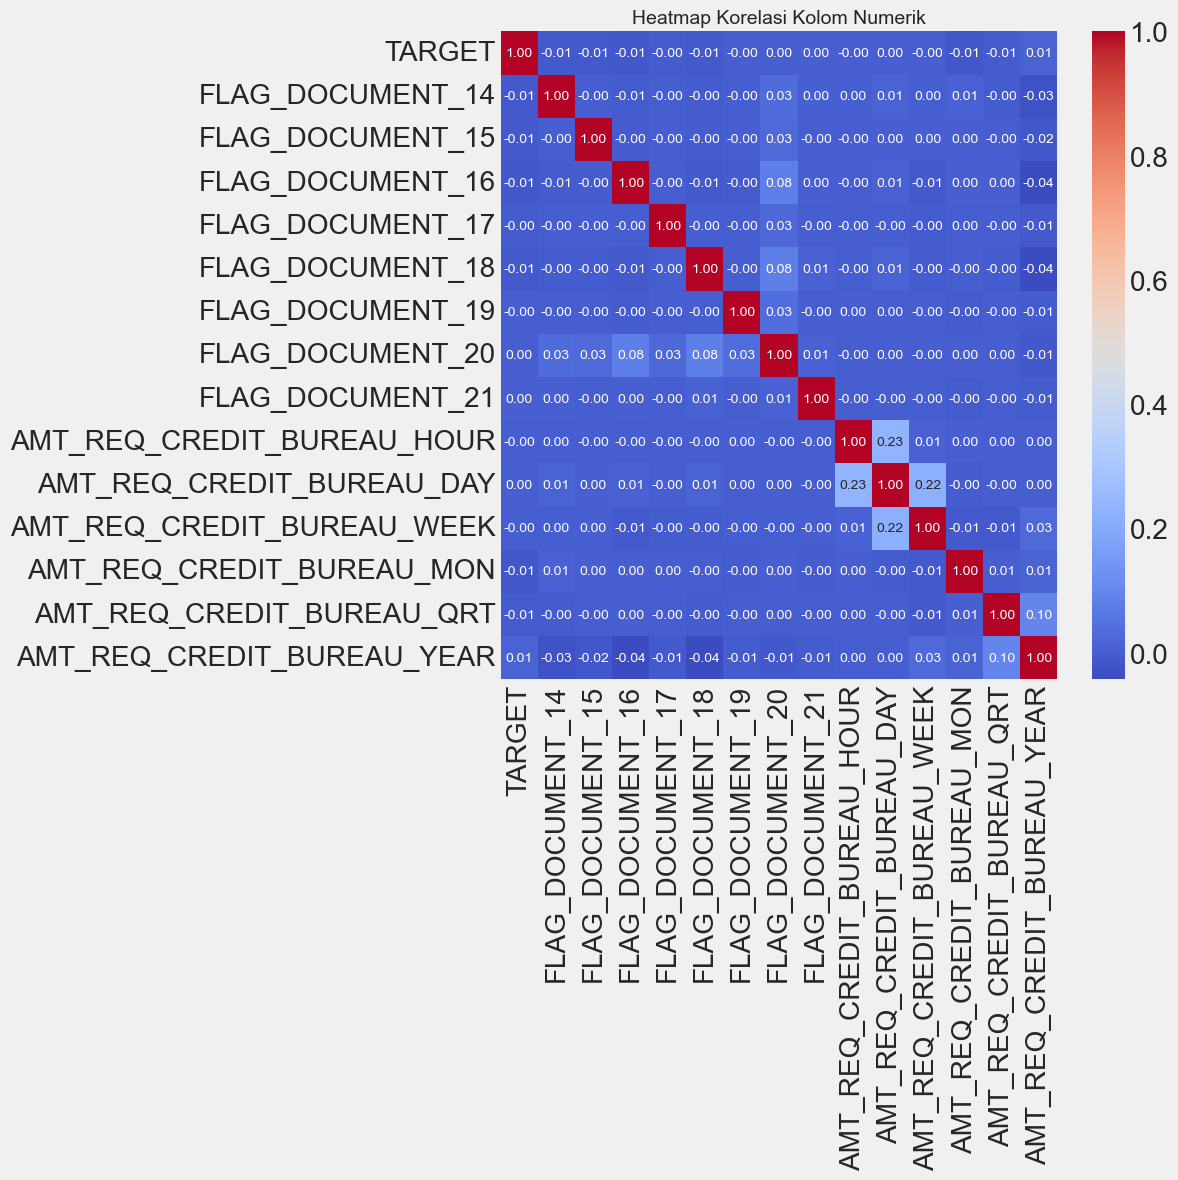

In [45]:
# Membuat heatmap dengan pengaturan ukuran font di dalam anotasi
plt.figure(figsize=(8, 8))
sns.heatmap(data[num7].corr(), cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size": 10})  # Mengatur ukuran font annotasi menjadi 10
plt.title('Heatmap Korelasi Kolom Numerik', fontsize=14)  # Mengatur ukuran font title
plt.show()


## Hasil Observasi dari Heatmap:

### Korelasi Rendah Antar Sebagian Besar Variabel:

- Sebagian besar variabel menunjukkan korelasi yang sangat rendah, terutama pada kolom FLAG_DOCUMENT_14 hingga FLAG_DOCUMENT_21. Korelasi antar kolom tersebut mendekati nol, yang menunjukkan bahwa masing-masing dokumen tidak memiliki hubungan linier yang kuat dengan variabel lainnya, termasuk dengan variabel target (TARGET).

### Korelasi Positif antara Variabel AMT_REQ_CREDIT_BUREAU:

#### Beberapa variabel yang terkait dengan permintaan informasi kredit dari biro kredit, seperti:
- AMT_REQ_CREDIT_BUREAU_HOUR dan AMT_REQ_CREDIT_BUREAU_DAY memiliki korelasi positif sebesar 0.23, menunjukkan bahwa jumlah permintaan informasi kredit dalam hitungan jam dan hari cenderung naik bersama-sama.
- AMT_REQ_CREDIT_BUREAU_DAY dan AMT_REQ_CREDIT_BUREAU_WEEK memiliki korelasi sebesar 0.22, mengindikasikan bahwa frekuensi permintaan dalam satu minggu berhubungan dengan frekuensi permintaan harian.
- Korelasi antar variabel terkait periode waktu ini menunjukkan adanya hubungan linier, meskipun cukup lemah, yang berarti bahwa klien yang lebih sering mengajukan permintaan dalam waktu singkat (jam, hari) juga cenderung melakukan permintaan kredit di waktu yang lebih panjang (minggu, bulan).

#### Korelasi Negatif pada AMT_REQ_CREDIT_BUREAU_YEAR:
- AMT_REQ_CREDIT_BUREAU_YEAR menunjukkan korelasi negatif kecil dengan variabel-variabel lainnya (sekitar -0.04), yang mengindikasikan sedikit hubungan negatif antara permintaan kredit tahunan dan beberapa aspek lainnya, meskipun hubungan ini sangat lemah.

#### Korelasi Sangat Lemah antara TARGET dan Variabel Lain:
- Korelasi antara variabel TARGET dengan variabel lain di dataset sangat rendah, mendekati nol, yang berarti tidak ada hubungan linier yang kuat antara variabel-variabel fitur dengan variabel target. Artinya, tidak ada fitur yang secara signifikan berhubungan dengan variabel target, dan ini dapat menunjukkan bahwa:
- Korelasi lemah ini menandakan bahwa fitur-fitur tersebut mungkin tidak menjadi prediktor yang kuat untuk menentukan outcome target (misalnya, default kredit atau hasil lainnya). Meskipun fitur-fitur ini berhubungan satu sama lain dalam konteks permintaan kredit, mereka tidak mempengaruhi langsung atau signifikan pada TARGET.

### Penjelasan Tentang Korelasi Antar Fitur:

#### Korelasi antar fitur diukur dalam rentang -1 hingga 1, di mana:

- Korelasi positif mendekati 1 menunjukkan hubungan langsung yang kuat: jika satu variabel naik, variabel lainnya cenderung naik.
- Korelasi negatif mendekati -1 menunjukkan hubungan terbalik yang kuat: jika satu variabel naik, variabel lainnya cenderung turun.
- Korelasi mendekati 0 menunjukkan tidak ada hubungan linier antara dua variabel.

Dalam heatmap ini, fitur-fitur seperti FLAG_DOCUMENT_* hampir tidak memiliki hubungan satu sama lain atau dengan variabel target. Namun, fitur-fitur yang terkait dengan permintaan kredit (contohnya AMT_REQ_CREDIT_BUREAU_*) menunjukkan sedikit hubungan linier antara frekuensi permintaan dalam berbagai periode waktu.

### Penjelasan tentang Tidak Ada Korelasi Kuat terhadap Variabel Target:
Korelasi sangat rendah antara variabel TARGET dengan variabel lainnya (mendekati 0) menunjukkan bahwa tidak ada hubungan linier yang signifikan antara fitur-fitur ini dengan target yang ingin diprediksi. Ada beberapa alasan mengapa hal ini terjadi:

- Tidak adanya hubungan linier langsung: Ini dapat berarti bahwa hubungan antara fitur dan target mungkin lebih kompleks dan tidak dapat ditangkap dengan korelasi linier. Mungkin ada interaksi non-linier atau fitur lain yang tidak disertakan yang lebih berpengaruh terhadap target.
- Kebutuhan akan fitur lain yang lebih relevan: Fitur-fitur yang digunakan dalam heatmap ini mungkin tidak cukup representatif atau relevan untuk memprediksi TARGET. Artinya, model prediktif bisa membutuhkan lebih banyak fitur atau fitur yang lebih informatif.